# Regression Metrics Exercise
Name: Kim Hazed Delfino

## Imports

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer

## Load Data

In [196]:
path = R"C:\Users\kdelfino\Documents\GitHub\regression-metrics-exercise\Boston_Housing_from_Sklearn.csv"
df = pd.read_csv(path)

## Data Exploration

In [197]:
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


- Dataset is cleaned and will be used `as-is`

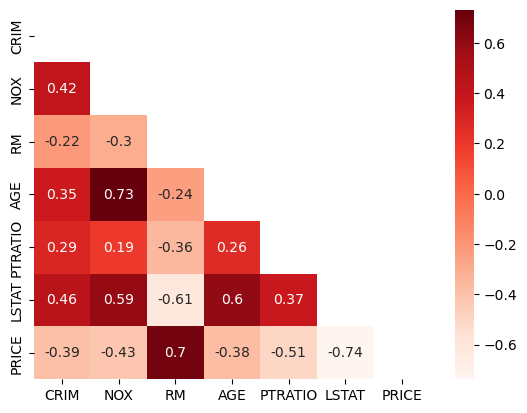

In [199]:
# Create heatmap 
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap="Reds", annot=True, mask=mask);

## Model validation

In [200]:
#splitting features & target
target = df["PRICE"]
# only using columns with moderate correlation with price as features
X = df[["RM", "PTRATIO","LSTAT"]]
y = target
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=42)


In [201]:
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


- all features are numerical so only using StandardScaler

## Instantiate and Fit model

In [202]:
#Create selector
num_selector = make_column_selector(dtype_include="number")

#Create scaler object 
scaler = StandardScaler()

#Create preprocessor
num_tuple = (scaler, num_selector)
preprocessor = make_column_transformer(num_tuple)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002B7B8FE7970>)])

In [203]:
#Create pipeline
reg = LinearRegression()
reg_pipe = make_pipeline(preprocessor,reg)

reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002B7B8FE7970>)])),
                ('linearregression', LinearRegression())])

## Measuring model perfomance

In [204]:
#functioning scores and pretty prints by creating class object
class pretty_print_scores:
    def __init__(self, X_train , X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.y_hat_train = reg_pipe.predict(X_train)
        self.y_hat_test = reg_pipe.predict(X_test)
    
    def get_scores(self, metric) -> dict:
        map = {
            "R2" : {
                "train r-squared Score" : round(r2_score(self.y_train,self.y_hat_train),3), 
                "test r-squared Score" : round(r2_score(self.y_test, self.y_hat_test),3),
                "Scaling" : " Higher the better"
            },

            "MAE" : {
                "train_MAE Score" : round(mean_absolute_error(self.y_train, self.y_hat_train),2),
                "test_MAE Score": round(mean_absolute_error(self.y_test, self.y_hat_test),2),
                "Scaling" : "Lower the Better"
            },
            
            "MSE" : {
                "train_MSE Score" : round(mean_squared_error(self.y_train, self.y_hat_train),2),
                "test_MSE Score" : round(mean_squared_error(self.y_test, self.y_hat_test),2),
                "Scaling" : "Lower the Better"
         
            },

            "RMSE" : {
                "train_RMSE Score" : round(mean_squared_error(self.y_train, self.y_hat_train, squared=False),2),
                "test_RMSE Score" : round(mean_squared_error(self.y_test, self.y_hat_test, squared=False),2),
                "Scaling" : "Lower the Better"
        
            }


        } 
        return map[metric]

In [205]:
# Instantiat 
model_pps = pretty_print_scores(X_train,X_test, y_train, y_test)

In [206]:
# Get score for R-Squared
model_pps.get_scores("R2")

{'train r-squared Score': 0.688,
 'test r-squared Score': 0.633,
 'Scaling': ' Higher the better'}

In [207]:
# Get score for Mean Absolute Error
model_pps.get_scores("MAE")

{'train_MAE Score': 3.71,
 'test_MAE Score': 3.39,
 'Scaling': 'Lower the Better'}

In [208]:
# Get score for Mean Squared Error
model_pps.get_scores("MSE")

{'train_MSE Score': 27.69,
 'test_MSE Score': 25.69,
 'Scaling': 'Lower the Better'}

In [209]:
# Get score for Root Mean Squared Error
model_pps.get_scores("RMSE")

{'train_RMSE Score': 5.26,
 'test_RMSE Score': 5.07,
 'Scaling': 'Lower the Better'}